In [4]:
import pandas as pd 
import sqlalchemy
import missingno as msn 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

df = pd.read_csv('../../EDA/df_estates3.csv')
#DROP COLUMNS
df = df.drop(columns=['adjustSquareMeterPrice', 'automaticACMPrice', 'created_at', 'terraceValue',
                       'utilityRoomValue', 'preofferAcmHigherValue','preofferAcmLowerValue','buildingFloors','estateFloors',
                       'rentValue','garageType','terraceArea','zone','garageValue', 'type'])

def preprocesamiento(df):
    #Drop rows with null values in Y variable
    df = df[df.finalACMPrice.notna()]
    #Calculate Antiguedad of a property in years
    df['Antiguedad'] = date.today().year - df['year']
    df['Antiguedad'] = df['Antiguedad'].astype(int)
    df = df.drop(columns=['id', 'purchaseCaseId', 'year'])
    #delete rows with null values in stratum variables
    df = df[df.stratum.notna()]
    #Turn floor to integer
    df = df[df.floor.notna()]
    df['floor'] = df['floor'].astype(int)
    #df = df[df.stratum.notna()]
    # Convert hasElevator to categorical
    df['hasElevator'] = df['hasElevator'].astype('category')
    return df

df = preprocesamiento(df)


C:\Users\User\AppData\Local\Temp\ipykernel_14952\3418913719.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = date.today().year - df['year']
C:\Users\User\AppData\Local\Temp\ipykernel_14952\3418913719.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = df['Antiguedad'].astype(int)


In [5]:
X = df.drop(columns=['finalACMPrice'])
y = df['finalACMPrice']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 test_size=0.2,
                                                    random_state=42)

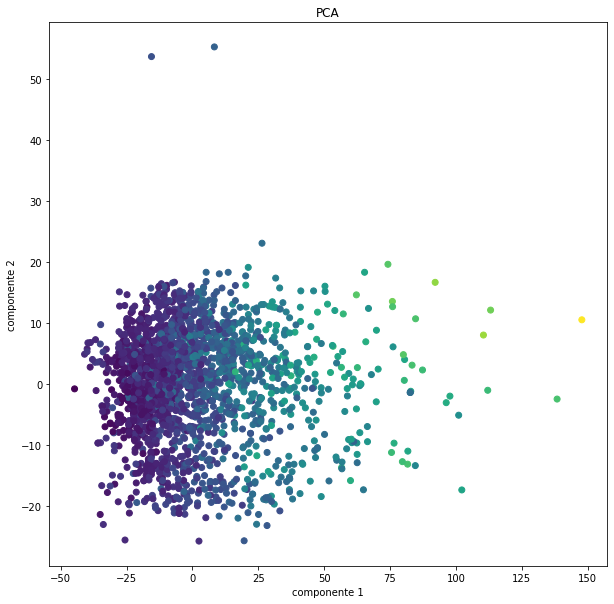

In [6]:
# haga un pca
from sklearn.decomposition import PCA

#pca
pca = PCA(n_components=2)
pca.fit(X_train)

#transformar
X_train_pca = pca.transform(X_train)

#plor 2 componentes
plt.figure(figsize=(10,10))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA')
plt.show()


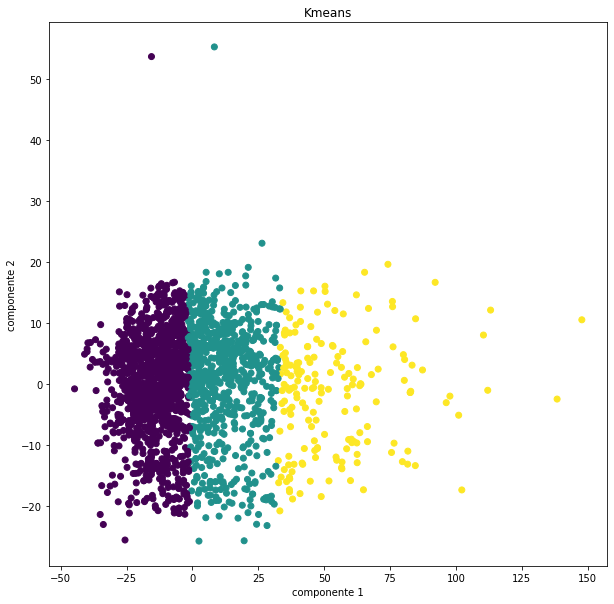

In [7]:
#apply kmeans to X_train
from sklearn.cluster import KMeans

#kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)

#predicciones
y_pred = kmeans.predict(X_train_pca)

#plot
plt.figure(figsize=(10,10))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_pred, cmap='viridis')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('Kmeans')
plt.show()